In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
adata = sc.read_h5ad("../data/annotated_adata.h5ad")

In [3]:
adata.var_names = np.array(adata.var['Symbol'])

In [4]:
adata.var_names_make_unique()

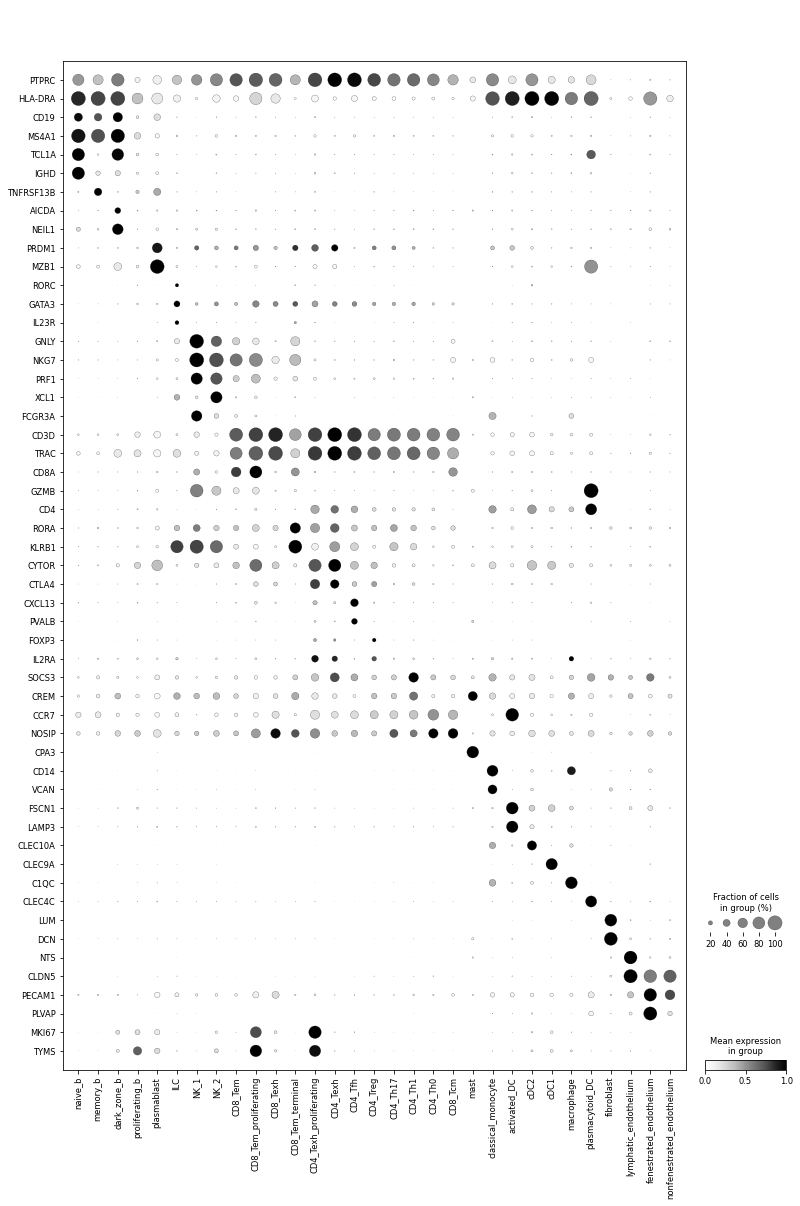

In [5]:
#small dict
gene_set = ['PTPRC', 'HLA-DRA', 'CD19', 'MS4A1',
            'TCL1A', 'IGHD',
            'TNFRSF13B',
            'AICDA', 'NEIL1',
            'PRDM1', 'MZB1',
            'RORC', 'GATA3', 'IL23R',
            'GNLY', 'NKG7', 'PRF1', 'XCL1', 'FCGR3A',
            'CD3D',
            'TRAC', 'CD8A', 'GZMB','CD4', 
           'RORA', 'KLRB1',
            'CYTOR', 'CTLA4',
            'CXCL13', 'PVALB',
            'FOXP3', 'IL2RA',
            'SOCS3', 'CREM',
            'CCR7', 'NOSIP',
            'CPA3', 'CD14', 'VCAN', 'FSCN1', 'LAMP3', 'CLEC10A', 'CLEC9A', 'C1QC', 'CLEC4C', 'LUM', 'DCN', 'NTS', 'CLDN5', 'PECAM1','PLVAP',  
           'MKI67', 'TYMS']
sc.pl.dotplot(adata, gene_set, 'cell_type', dendrogram=False, 
              cmap = 'Greys', standard_scale='var',swap_axes = True, save = 'total_marker_heatmap.pdf')


In [6]:
adata = adata[adata.obs['cell_type'].isin(['CD4_Texh', 'CD4_Tfh', 'CD4_Treg', 'CD4_Th17', 'CD4_Th1', 'CD4_Th0', 'CD8_Texh', 'CD8_Tem','CD8_Tem_terminal', 'CD8_Tcm'])]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


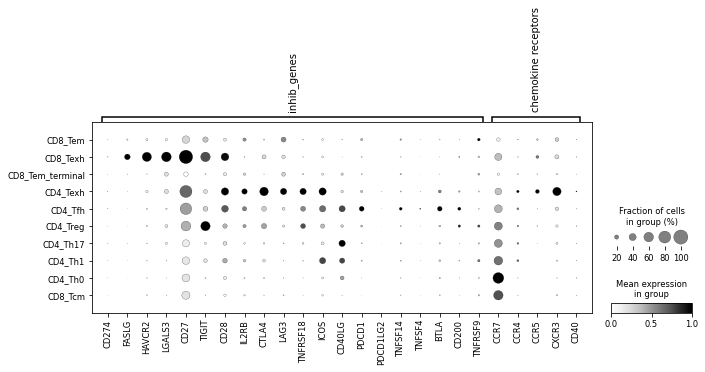

In [7]:
gene_list = {'inhib_genes': ['CD274', 'FASLG', 'HAVCR2', 'LGALS3','CD27', 'TIGIT',
               'CD28', 'IL2RB',
               'CTLA4', 'LAG3', 'TNFRSF18', 'ICOS',
                'CD40LG',
               'PDCD1', 'PDCD1LG2',  'TNFSF14', 'TNFSF4',
               'BTLA',  'CD200', 'TNFRSF9'],
             'chemokine receptors': ['CCR7', 'CCR4', 'CCR5', 'CXCR3', 'CD40']}  
cells_plot = ['CD8_Tem', 'CD8_Texh', 'CD8_Tcm', 'CD8_Tem_terminal', 'CD4_Texh', 'CD4_Tfh', 'CD4_Treg', 'CD4_Th17', 'CD4_Th1', 'CD4_Th0']
sc.pl.dotplot(adata[adata.obs['cell_type'].isin(cells_plot)], gene_list, groupby = 'cell_type',  dendrogram=False, 
              cmap = 'Greys', standard_scale='var',swap_axes = False , save = 'exhaustion_heatmap.pdf', dot_max=1, dot_min=0)